In [1]:
# pymupdf paddlepaddle frontend paddleocr transformers torch langdetect pdfplumber pdf2image
!pip install -qq pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 56.0 MB/s eta 0:00:00:00:010:01


In [2]:
import os
import fitz
from pathlib import Path

In [3]:
def pdf_to_images(pdf_path, output_folder, zoom_x=2, zoom_y=2):
    try:
        pdf_name = Path(pdf_path).stem
        pdf_document = fitz.open(pdf_path)
        
        converted_pages = 0
        
        # Iterate through the pages
        for page_num in range(len(pdf_document)):
            try:
                # Get the page
                page = pdf_document.load_page(page_num)
                # Set the zoom factor for higher resolution
                mat = fitz.Matrix(zoom_x, zoom_y)
                # Get the pixmap (image) of the page
                pix = page.get_pixmap(matrix=mat)
                # Save the image with PDF name and page number
                image_path = os.path.join(output_folder, f"{pdf_name}_page_{page_num + 1}.png")
                pix.save(image_path)
                converted_pages += 1
                # print(f"Saved {image_path}")
            except Exception as e:
                print(f"Error processing page {page_num + 1} of {pdf_path}: {str(e)}")
                continue
        pdf_document.close()
        return converted_pages
    except Exception as e:
        print(f"Error processing PDF {pdf_path}: {str(e)}")
        return 0


In [7]:
import os
from pathlib import Path
import shutil
import zipfile

def process_pdf_folder(input_folder, output_folder='images_folder_english', zoom_x=2, zoom_y=2, max_files=10000):
    os.makedirs(output_folder, exist_ok=True)
    pdf_files = list(Path(input_folder).glob("*.pdf"))
    
    # Limit to max_files if more than max_files PDFs are found
    pdf_files = pdf_files[:max_files]
    
    print(f'Found {len(pdf_files)} pdfs to process.')
    processed_pdfs, total_pages = 0, 0
    for pdf_path in pdf_files:
        print(f"\nProcessing {pdf_path.name} ({processed_pdfs + 1}/{len(pdf_files)})")
        
        pages_converted = pdf_to_images(str(pdf_path), output_folder, zoom_x, zoom_y)
        processed_pdfs += 1
        total_pages += pages_converted
        
        print(f"Completed {pdf_path.name}: {pages_converted} pages converted")
    
    # Create a zip file for the output folder
    zip_output_folder(output_folder)
    
    print(f"\nProcessing complete!")
    print(f"Total PDFs processed: {processed_pdfs}/{len(pdf_files)}")
    print(f"Total pages converted: {total_pages}")
    print(f"All images saved in: {os.path.abspath(output_folder)}")
    print(f"Output folder zipped as: {os.path.abspath(output_folder)}.zip")

In [8]:
if __name__ == '__main__':
    input_folder = "/kaggle/input/hillary-clinton-emails/pdfs"
        
        # Process all PDFs
    process_pdf_folder(input_folder)

Found 10000 pdfs to process.

Processing C05760338.pdf (1/10000)
Completed C05760338.pdf: 1 pages converted

Processing C05739639.pdf (2/10000)
Completed C05739639.pdf: 2 pages converted

Processing C05781756.pdf (3/10000)
Completed C05781756.pdf: 1 pages converted

Processing C06160818.pdf (4/10000)
Completed C06160818.pdf: 1 pages converted

Processing C05770992.pdf (5/10000)
Completed C05770992.pdf: 1 pages converted

Processing C05784956.pdf (6/10000)
Completed C05784956.pdf: 1 pages converted

Processing C06158101.pdf (7/10000)
Completed C06158101.pdf: 1 pages converted

Processing C05766271.pdf (8/10000)
Completed C05766271.pdf: 2 pages converted

Processing C05772997.pdf (9/10000)
Completed C05772997.pdf: 1 pages converted

Processing C05773520.pdf (10/10000)
Completed C05773520.pdf: 1 pages converted

Processing C05771846.pdf (11/10000)
Completed C05771846.pdf: 3 pages converted

Processing C05793751.pdf (12/10000)
Completed C05793751.pdf: 1 pages converted

Processing C0579515

KeyboardInterrupt: 

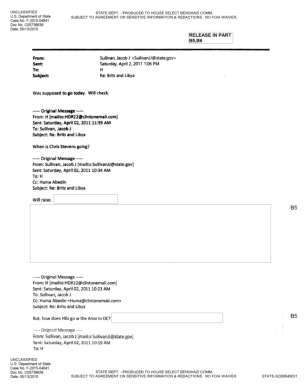

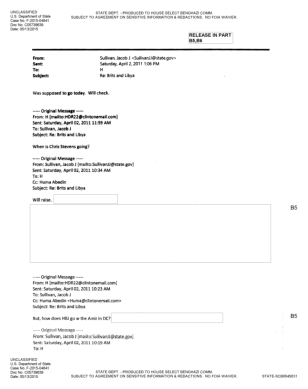

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the image
img = mpimg.imread('/kaggle/working/images_folder_english/C05739639_page_1.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Convert to grayscale
gray_img = img.mean(axis=2)

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()
